In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. 计算中心度。
（1）写出对应的邻边矩阵，以及点6的邻边列表；计算图的直径；计算每个节点的点度、接近、和中介中心度，并进行标准化。

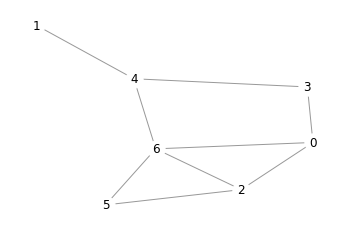

'Graph with 7 nodes and 9 edges'

In [2]:
G = nx.Graph()
[G.add_node(i) for i in range(7)] #把点按照顺序录入，以固定顺序（否则顺序是随机的）
G.add_edges_from([(1,4), (4,3), (4,6), (3,0), (6,0), 
                  (6,5), (6,2), (6,0), (0,2), (5,2)])
pos = nx.spring_layout(G, seed = 100) #用spring_layout计算每个点应该在的位置
nx.draw_networkx_labels(G, pos) #在位置上标出点的编号
nx.draw_networkx_nodes(G, pos, node_color = 'white') #画点（为美观，仅给编号提供白色背景）
nx.draw_networkx_edges(G, pos, alpha=0.8, edge_color='grey') #连线
plt.axis('off'); plt.show(); nx.info(G)

邻边矩阵

In [3]:
#如果之前没有用add_node固定顺序，则必须用nodelist，否则得到的matrix中点的顺序是随机的
#此处不需要用nodelist，仅做示例
nx.adjacency_matrix(G, nodelist=range(7)).todense()

matrix([[0, 0, 1, 1, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 1, 1],
        [1, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 1, 0, 0, 1],
        [0, 0, 1, 0, 0, 0, 1],
        [1, 0, 1, 0, 1, 1, 0]])

点6的邻边列表（因为是无方向图，邻边两点的前后顺序不重要）

In [4]:
print([i for i in G.edges() if 6 in i])

[(0, 6), (2, 6), (4, 6), (5, 6)]


图的直径: 最长路径有很多，比如1-4-6-5.直径为图中最长路径的距离=3

In [5]:
nx.diameter(G)

3

计算每个节点的点度、接近、和中介中心度，并进行标准化。以点0为例：

1. 点度中心度（非标准化）= 3，点度中心度（标准化）= 3/6 = 0.5

2. $\sum_{u\neq v}d(u,v)=3+1+1+2+2+1 = 10$: 接近中心度（非标准化）= 1/10 = 0.1，接近中心度（标准化）= 6/10 = 0.6
3. 中介中心度计算见下表（Networkx所用标准化公式与我们所介绍的不一样，两者皆可）。原表格可见github

<div>
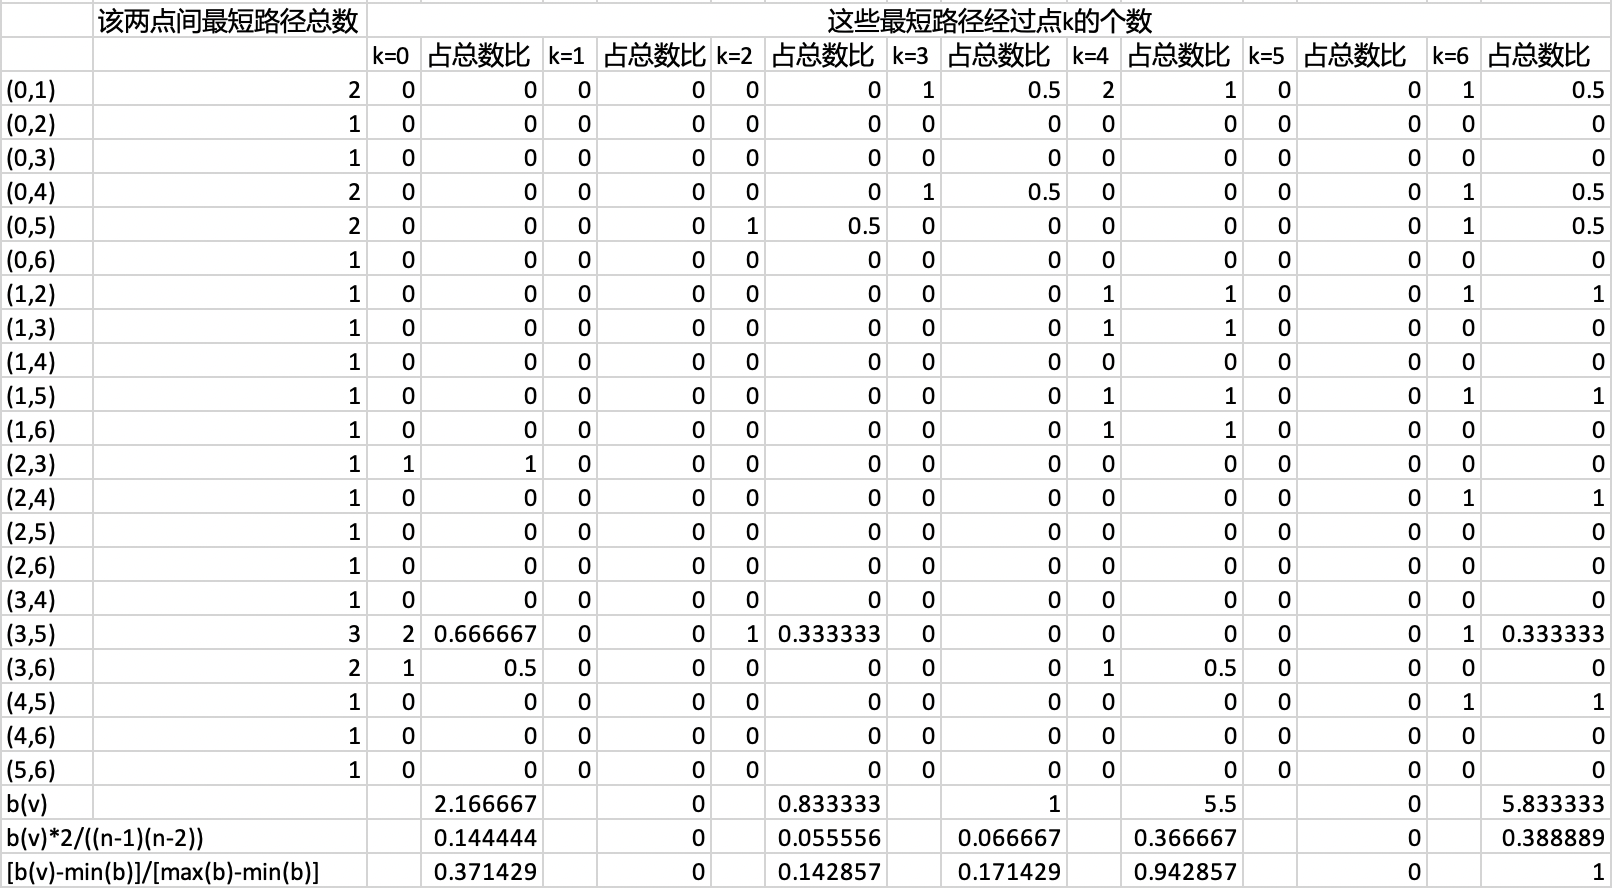
</div>

In [6]:
#如果之前没有用add_node固定顺序，则须用sorted先排序得到从0-6相对应的中心度
#此处因为顺序已经排好，我们不需要sorted，仅做示例

result = pd.DataFrame()
result["点度中心度-值"] = [i[1] for i in sorted(nx.degree(G))]
result["点度中心度-标准化"] = [i[1] for i in sorted(nx.degree_centrality(G).items())]

closeness = [i[1] for i in sorted(nx.closeness_centrality(G).items())]
result["接近中心度-值"] = np.array(closeness)/(len(G.nodes())-1)
result["接近中心度-标准化"] = closeness

result["中介中心度-值"] = [i[1] for i in sorted(nx.betweenness_centrality(G, normalized=False).items())]
result["中介中心度-标准化(networkx)"] = [i[1] for i in sorted(nx.betweenness_centrality(G).items())]
result["中介中心度-标准化（原定义）"] = result["中介中心度-值"]/5.83333333

In [7]:
result

,点度中心度-值,点度中心度-标准化,接近中心度-值,接近中心度-标准化,中介中心度-值,中介中心度-标准化(networkx),中介中心度-标准化（原定义）
0,3,0.500000,0.100000,0.600000,2.166667,0.144444,0.371429
1,1,0.166667,0.071429,0.428571,0.000000,0.000000,0.000000
2,3,0.500000,0.100000,0.600000,0.833333,0.055556,0.142857
3,2,0.333333,0.090909,0.545455,1.000000,0.066667,0.171429
4,3,0.500000,0.111111,0.666667,5.833333,0.388889,1.000000
5,2,0.333333,0.083333,0.500000,0.000000,0.000000,0.000000
6,4,0.666667,0.125000,0.750000,6.166667,0.411111,1.057143


（2）假设这个图代表的是一个传递信息的网络。谁是网络中对信息的掌控力最强（一旦移除，对信息流通影响最大）的节点，为什么？谁是网络中能最有效率地获取信息的节点，为什么？

答：如上所示，点6中介中心度最高，因此对信息的掌控力最强。点6的接近中心度也是最高的，因此能最有效率地获取信息。

## 2. 计算密度和集聚系数

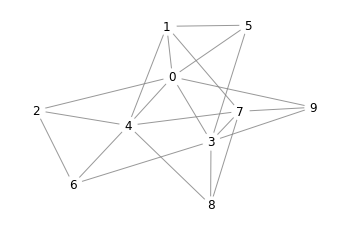

'Graph with 10 nodes and 21 edges'

In [8]:
G = nx.Graph()
[G.add_node(i) for i in range(10)] 
G.add_edges_from([(0,1), (0,2), (0,3), (0,4), (0,5), (0,9),
                  (1,4), (1,5), (1,7), (2,4), (2,6), 
                  (3,5), (3,6), (3,7), (3,8), (3,9),
                  (4,6), (4,7), (4,8), (7,8), (7,9)])
pos = nx.spring_layout(G, seed = 100) 
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_nodes(G, pos, node_color = 'white') 
nx.draw_networkx_edges(G, pos, alpha=0.8, edge_color='grey')
plt.axis('off'); plt.show(); nx.info(G)

（1）计算密度。

In [10]:
E = len(G.edges()); V = len(G.nodes())
print("2E/(V(V-1))=", 2*E/(V*(V-1)), "或者直接用nx.density:", nx.density(G))

2E/(V(V-1))= 0.4666666666666667 或者直接用nx.density: 0.4666666666666667


（2）以点0为顶点的开放三元组、闭合三元组各有几个？计算点0的局部集聚系数。

点0的邻边：(0,1), (0,2), (0,3), (0,4), (0,5), (0,9)

开放三元组有10个: (0,1,2), (0,1,3), (0,1,9), (0,2,3), (0,2,5), (0,2,9), (0,3,4), 
(0,4,5), (0,4,9), (0,5,9)

闭合三元组有5个: (0,1,4), (0,1,5), (0,2,4), (0,3,5), (0,3,9)

局部集聚系数 = 5/15 = 0.3333

In [11]:
nx.clustering(G)[0] #局部集聚系数

0.3333333333333333

3.	结合所学的专业知识，请问中心度是否能作为一种度量权力的方式？如果是，你认为该用哪一种中心度，是否需要对原有算法进行改良，该如何解释这种中心度所测量的权力在现实中的意义？如果不是，请说明理由。在权力这个概念中，什么是中心度无法测量的部分？

答：没有确定的答案，但Bonacich (1987)是一个值得参考的综述。我们需要思考的理论问题是，对于某个研究来说，权力究竟是什么？比如，如果我们认为它是一种地位(status)或者阶级，那或许我们可以像Podolny (2001)那样，假设认识地位高的人也倾向于有更高的地位，并用类似特征向量中心度的方式计算权力。如果我们认为它是一种仲裁的能力，让人能在鹬蚌相争时渔翁得利，那或许我们可以用Burt (1992)的结构洞来测量权力。当你不确定的时候，可以先问自己：在你的网络图中，两点之间的连边有什么现实意义？在这个图中可以顺着点和边流动的是什么——是命令，信息，还是情感？

Bonacich, P. (1987). Power and Centrality: A Family of Measures. American Journal of Sociology, 92(5), 1170–1182. http://www.jstor.org/stable/2780000

Podolny, J. M. (2001). Networks as the Pipes and Prisms of the Market. American Journal of Sociology, 107(1), 33–60. https://doi.org/10.1086/323038

Burt, R. S. (1992). Structural Holes: The Social Structure of Competition. Harvard University Press. http://www.jstor.org/stable/j.ctv1kz4h78